In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /Users/carol/Documents/etl/workshop-02


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
df = pd.read_csv('../data/the_grammy_awards.csv',sep=',', encoding='utf-8')

In [145]:
df.shape

(4810, 10)

In [146]:
df.columns

Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

In [41]:
df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [147]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape[0])

number of duplicate rows:  0


## Data missing

In [148]:
missing_data = df.isna().sum()
missing_data

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

In [10]:
df[df['nominee'].isna()]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2261,2000,43rd Annual GRAMMY Awards (2000),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,"Remixer of the Year, Non-Classical",NaN,NaN,NaN,NaN,True
2359,1999,42nd Annual GRAMMY Awards (1999),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
2454,1998,41st Annual GRAMMY Awards (1998),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,"Remixer Of The Year, Non-classical",NaN,NaN,NaN,NaN,True
2547,1997,40th Annual GRAMMY Awards (1997),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
4525,1965,8th Annual GRAMMY Awards (1965),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best New Country & Western Artist,NaN,NaN,NaN,NaN,True
4573,1964,7th Annual GRAMMY Awards (1964),2017-11-28T00:03:45-08:00,2019-09-10T01:06:11-07:00,Best New Country & Western Artist Of 1964,NaN,NaN,NaN,NaN,True


In [63]:
df_nulos = df[df['artist'].isna() | df['workers'].isna()]

nulos_por_categoria = df_nulos.groupby('category').apply(lambda x: pd.Series({
    'nulos_artist': x['artist'].isna().sum(),
    'nulos_workers': x['workers'].isna().sum()
}))

nulos_por_categoria['total_nulos'] = nulos_por_categoria['nulos_artist'] + nulos_por_categoria['nulos_workers']
nulos_ordenados = nulos_por_categoria.sort_values(by='total_nulos', ascending=False)

nulos_ordenados

C:\Users\carol\AppData\Local\Temp\ipykernel_12576\2858583520.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_por_categoria = df_nulos.groupby('category').apply(lambda x: pd.Series({


,nulos_artist,nulos_workers,total_nulos
category,,,
Best New Artist,50,51,101
Song Of The Year,70,0,70
Best Opera Recording,64,0,64
Best Album Notes,63,0,63
Best Country Song,55,0,55
...,...,...,...
Best Contemporary (R&R) Performance - Group (Vocal Or Instrumental),0,1,1
"Best Contemporary (R&R) Group Performance, Vocal Or Instrumental",0,1,1
Best Composition By A Contemporary Composer,1,0,1


In [64]:
df[df['category'].str.startswith("Remixer", na=False)]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2261,2000,43rd Annual GRAMMY Awards (2000),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,"Remixer of the Year, Non-Classical",NaN,NaN,NaN,NaN,True
2359,1999,42nd Annual GRAMMY Awards (1999),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
2454,1998,41st Annual GRAMMY Awards (1998),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,"Remixer Of The Year, Non-classical",NaN,NaN,NaN,NaN,True
2547,1997,40th Annual GRAMMY Awards (1997),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True


In [65]:
df[df['category'].str.startswith("Best New A", na=False)]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
24,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,NaN,NaN,NaN,True
25,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,NaN,NaN,NaN,True
26,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,NaN,NaN,NaN,True
27,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,NaN,NaN,NaN,True
28,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...
4627,1963,6th Annual GRAMMY Awards (1963),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best New Artist Of 1963,Ward Swingle (The Swingle Singers),NaN,NaN,NaN,True
4666,1962,5th Annual GRAMMY Awards (1962),2017-11-28T00:03:45-08:00,2019-09-10T01:09:02-07:00,Best New Artist Of 1962,Robert Goulet,NaN,NaN,NaN,True
4697,1961,4th Annual GRAMMY Awards (1961),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Best New Artist Of 1961,Peter Nero,NaN,NaN,NaN,True
4745,1960,3rd Annual GRAMMY Awards (1960),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,Best New Artist Of 1960,Bob Newhart,NaN,NaN,NaN,True


In [42]:
df[df['nominee']=='Lover']

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
20,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,NaN,"Taylor Swift, songwriter (Taylor Swift)",https://www.grammy.com/sites/com/files/styles/...,True
51,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Pop Vocal Album,Lover,Taylor Swift,NaN,https://www.grammy.com/sites/com/files/styles/...,True


In [53]:
print('Nulos', int(df[df['category']=='Song Of The Year']['artist'].isna().sum()))
print('No nulos', int(df[df['category']=='Song Of The Year']['artist'].notna().sum()))

Nulos 70
No nulos 0


In [57]:
df[df['nominee']=='Love Theory']

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
187,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Love Theory,NaN,"Kirk Franklin; Kirk Franklin, songwriter",https://www.grammy.com/sites/com/files/styles/...,True


In [56]:
df.groupby('year')['artist'].apply(lambda x: x.isna().sum())

year
1958     13
1959     17
1960     18
1961     22
1962     21
       ... 
2015     33
2016     34
2017     32
2018     34
2019    177
Name: artist, Length: 62, dtype: int64

In [58]:
df[df['category'].isna()].isna().sum()

year            0
title           0
published_at    0
updated_at      0
category        0
nominee         0
artist          0
workers         0
img             0
winner          0
dtype: int64

## Data type

In [150]:
df.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

## Data Distribution

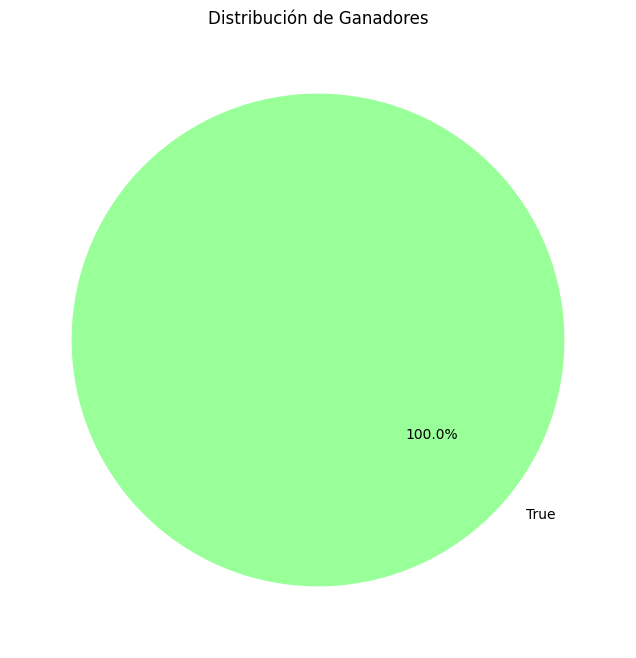

In [7]:
counts = df['winner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#99FF99', '#FF9999'])
plt.title('Distribución de Ganadores')
plt.show()

In [254]:
grouped = df.groupby(['year', 'title', 'category'])

for name, group in grouped:
    if len(group) > 2:
        df.loc[group.index[0], 'winner'] = True
        df.loc[group.index[1:], 'winner'] = False

In [255]:
df = df[df['winner'] == True]

In [178]:
winner_count = df[df['winner']].groupby(['category', 'year']).size()

tie_results = winner_count[winner_count == 2].index 

df_tie_results = df[(df.set_index(['category', 'year']).index.isin(tie_results)) & (df['winner']==True)].sort_values(by='year')

df_tie_results.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
4767,1959,2nd Annual GRAMMY Awards (1959),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best Broadway Show Album,Redhead,NaN,"Gwen Verdon (Gwen Verdon, Richard Kiley, Leona...",NaN,True
4766,1959,2nd Annual GRAMMY Awards (1959),2017-11-28T00:03:45-08:00,2019-09-10T01:06:59-07:00,Best Broadway Show Album,Gypsy,NaN,Ethel Merman (Ethel Merman And Broadway Show C...,NaN,True
4705,1961,4th Annual GRAMMY Awards (1961),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Best Contemporary Classical Composition,Almeida: Discantus,NaN,"Laurindo Almeida, composer",NaN,True
4706,1961,4th Annual GRAMMY Awards (1961),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Best Contemporary Classical Composition,Stravinsky: Movements For Piano And Orchestra,NaN,"Igor Stravinsky, composer",https://www.grammy.com/sites/com/files/styles/...,True
4490,1966,9th Annual GRAMMY Awards (1966),2017-11-28T00:03:45-08:00,2019-09-10T01:07:37-07:00,Best Classical Choral Performance (Other Than ...,Ives: Music For Chorus,NaN,"(Ithaca College Concert Choir, Gregg Smith Sin...",NaN,True


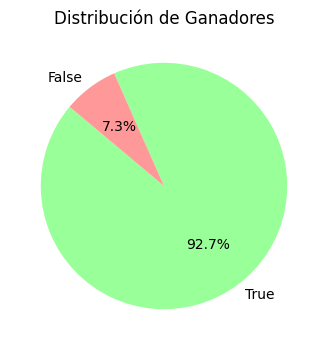

In [20]:
counts = df['winner'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#99FF99', '#FF9999'])
plt.title('Distribución de Ganadores')
plt.show()

In [256]:
extracted_artists = df['workers'].str.extract(r'\(([^)]+)\)', expand=False)
df['artist'] = df['artist'].fillna(extracted_artists)

C:\Users\carol\AppData\Local\Temp\ipykernel_3316\3361237568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist'] = df['artist'].fillna(extracted_artists)


In [6]:
df[(df['year']== 1958) & (df['category'] == 'Best Classical Performance - Operatic Or Choral') ]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
4809,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Operatic Or Choral,Virtuoso,NaN,"Roger Wagner, choir director",NaN,True


In [8]:
df[(df['year']== 1958) & (df['nominee'] == 'Virtuoso') ]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
4809,1958,1st Annual GRAMMY Awards (1958),2017-11-28T00:03:45-08:00,2019-09-10T01:11:09-07:00,Best Classical Performance - Operatic Or Choral,Virtuoso,NaN,"Roger Wagner, choir director",NaN,True


In [106]:
spotify_df = pd.read_csv('../data/spotify_dataset.csv',sep=',', encoding='utf-8')

In [259]:
df = pd.read_csv('../data/the_grammy_awards.csv',sep=',', encoding='utf-8')

In [260]:
grouped = df.groupby(['year', 'title', 'category'])

for name, group in grouped:
    if len(group) > 2:
        df.loc[group.index[0], 'winner'] = True
        df.loc[group.index[1:], 'winner'] = False

In [261]:
df = df[df['winner'] == True]

In [262]:
extracted_artists = df['workers'].str.extract(r'\(([^)]+)\)', expand=False)
df['artist'] = df['artist'].fillna(extracted_artists)

C:\Users\carol\AppData\Local\Temp\ipykernel_3316\3361237568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist'] = df['artist'].fillna(extracted_artists)


In [272]:
df.rename(columns={
    'winner': 'grammy_winner',
    'year': 'grammy_year',
    'nominee': 'track_name',
    'artist': 'artists'
}, inplace=True)

df['track_name'] = df['track_name'].str.title().str.strip()
df['artists'] = df['artists'].str.title().str.strip()
spotify_df['track_name'] = spotify_df['track_name'].str.title().str.strip()
spotify_df['artists'] = spotify_df['artists'].str.title().str.strip()

df_aggregated = df.groupby(['track_name', 'artists']).agg({
    'grammy_winner': 'max',          # If you have multiple awards, we take the most recent one
    'grammy_year': 'max'             # most recent year
}).reset_index()

grammy_count = df.groupby(['track_name', 'artists']).size().reset_index(name='number_wins')

df_aggregated = pd.merge(df_aggregated, grammy_count, on=['track_name', 'artists'], how='left')

merged_df = pd.merge(spotify_df, df_aggregated, on=['track_name', 'artists'], how='left')

merged_df['grammy_winner'].fillna('False', inplace=True)
merged_df['number_wins'].fillna(0, inplace=True)

merged_df['grammy_year'] = merged_df['grammy_year'].astype('Int64')
merged_df['number_wins'] = pd.to_numeric(merged_df['number_wins'], downcast='integer', errors='coerce')


C:\Users\carol\AppData\Local\Temp\ipykernel_3316\2204043191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={
C:\Users\carol\AppData\Local\Temp\ipykernel_3316\2204043191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_name'] = df['track_name'].str.title().str.strip()
C:\Users\carol\AppData\Local\Temp\ipykernel_3316\2204043191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [236]:
merged_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,grammy_winner,grammy_year
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,False,
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,False,
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;Zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,False,
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can'T Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,False,
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,False,
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,False,
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,False,
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,False,


In [237]:
df[df['track_name'] == 'Bad Guy']

,grammy_year,title,published_at,updated_at,category,track_name,artists,workers,img,grammy_winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, s...",https://www.grammy.com/sites/com/files/styles/...,True


In [277]:
grammy_count.head(15)

,track_name,artists,number_wins
0,#Eldisco,Alejandro Sanz,1
1,'Round Midnight,Bobby Mcferrin,2
2,'Til Summer Comes Around,Keith Urban,1
3,(Everything I Do) I Do It For You (From Robin ...,"Bryan Adams, Michael Kamen & Robert John ""Mutt...",1
4,(Hey Won'T You Play) Another Somebody Done Som...,B.J. Thomas,1
5,(I'M A) Stand By My Woman Man,Ronnie Milsap,1
6,(I'Ve Had) The Time Of My Life,Jennifer Warnes & Bill Medley,1
7,(Sittin' On) The Dock Of The Bay,Otis Redding,2
8,(There'S) No Gettin' Over Me,Ronnie Milsap,1
9,...Again,Donnie Mcclurkin,1


In [275]:
grammy_count[grammy_count['track_name']== 'Bad Guy']


,track_name,artists,number_wins
319,Bad Guy,Billie Eilish,2


In [267]:
merged_df[merged_df['track_name']== 'Bad Guy']


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,grammy_winner,grammy_year,number_wins
14928,14928,1IWuiJ7X8zaPmK9NiL0lH6,Twinkle Twinkle Little Rock Star,Lullaby Versions of Billie Eilish,Bad Guy,28,266571,False,0.725,0.0524,...,0.97900,0.9350,0.0943,0.185,140.028,5,children,False,<NA>,0
31018,31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Bad Guy,84,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31033,31033,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,Bad Guy,1,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31040,31040,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,Bad Guy,1,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31044,31044,2yNKDG4FgwzQuL0JUEOunR,Billie Eilish,Herbststimmung,Bad Guy,1,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31046,31046,6DBdYfd4EkR6cUPSqtEwhQ,Billie Eilish,Beginner Ride (Sweat & Burn),Bad Guy,2,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31047,31047,4Vzpf1TmxKmczOiTAfheBs,Billie Eilish,Halloween 2022,Bad Guy,0,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
31049,31049,1c8h1SBYY44ys4EuaIZJMn,Billie Eilish,Halloween Party 2022,Bad Guy,0,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,electro,True,2019,2
81526,81526,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,Bad Guy,1,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,pop,True,2019,2
81533,81533,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,Bad Guy,1,194087,False,0.701,0.4250,...,0.32800,0.1300,0.1000,0.562,135.128,4,pop,True,2019,2


In [268]:
spotify_df[spotify_df['track_name'] == 'Bad Guy']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14928,14928,1IWuiJ7X8zaPmK9NiL0lH6,Twinkle Twinkle Little Rock Star,Lullaby Versions of Billie Eilish,Bad Guy,28,266571,False,0.725,0.0524,...,-30.335,0,0.1020,0.97900,0.9350,0.0943,0.185,140.028,5,children
31018,31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Bad Guy,84,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31033,31033,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,Bad Guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31040,31040,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,Bad Guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31044,31044,2yNKDG4FgwzQuL0JUEOunR,Billie Eilish,Herbststimmung,Bad Guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31046,31046,6DBdYfd4EkR6cUPSqtEwhQ,Billie Eilish,Beginner Ride (Sweat & Burn),Bad Guy,2,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31047,31047,4Vzpf1TmxKmczOiTAfheBs,Billie Eilish,Halloween 2022,Bad Guy,0,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
31049,31049,1c8h1SBYY44ys4EuaIZJMn,Billie Eilish,Halloween Party 2022,Bad Guy,0,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,electro
81526,81526,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,Bad Guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,pop
81533,81533,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,Bad Guy,1,194087,False,0.701,0.4250,...,-10.965,1,0.3750,0.32800,0.1300,0.1000,0.562,135.128,4,pop


In [127]:
merged_df[merged_df['track_name'] == 'Smooth']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,tempo,time_signature,track_genre,artist_x,grammy_winner,grammy_year,artist_y,count,artist,number_wins


In [143]:
merged_df[merged_df['number_wins']==2]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,artist_x,grammy_winner,grammy_year,artist_y,number_wins
637,637,18k8IlS52uxRWObykDUZFG,Brandi Carlile,"By The Way, I Forgive You",The Joke,60,279373,False,0.236,0.578,...,0.2060,0.227,75.367,4,acoustic,Brandi Carlile,True,2018.0,Brandi Carlile,2.0
638,637,18k8IlS52uxRWObykDUZFG,Brandi Carlile,"By The Way, I Forgive You",The Joke,60,279373,False,0.236,0.578,...,0.2060,0.227,75.367,4,acoustic,Brandi Carlile,True,2018.0,Brandi Carlile,2.0
2061,2060,7oMO1B9CB4ZPYPLeVe32OY,R.E.M.,90's Music Grandi Successi,Losing My Religion,0,268426,False,0.666,0.854,...,0.0986,0.803,125.637,4,alt-rock,R.E.M.,True,1991.0,R.E.M.,2.0
2062,2060,7oMO1B9CB4ZPYPLeVe32OY,R.E.M.,90's Music Grandi Successi,Losing My Religion,0,268426,False,0.666,0.854,...,0.0986,0.803,125.637,4,alt-rock,R.E.M.,True,1991.0,R.E.M.,2.0
2205,2203,31AOj9sFz2gM0O3hMARRBx,R.E.M.,Out Of Time (25th Anniversary Edition),Losing My Religion,84,268426,False,0.666,0.855,...,0.0987,0.803,125.639,4,alt-rock,R.E.M.,True,1991.0,R.E.M.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103746,103568,7DCiOOtP3baRrHoSzlkNuj,Chaka Khan,OK Boomers - Top Tunes,I Feel For You,0,218880,False,0.794,0.925,...,0.1970,0.924,124.881,4,soul,Chaka Khan,True,1984.0,Chaka Khan,2.0
103892,103712,6IwKcFdiRQZOWeYNhUiWIv,Alicia Keys,As I Am (Expanded Edition),No One,78,253813,False,0.644,0.549,...,0.1340,0.167,90.040,4,soul,Alicia Keys,True,2007.0,Alicia Keys,2.0
103893,103712,6IwKcFdiRQZOWeYNhUiWIv,Alicia Keys,As I Am (Expanded Edition),No One,78,253813,False,0.644,0.549,...,0.1340,0.167,90.040,4,soul,Alicia Keys,True,2007.0,Alicia Keys,2.0
104068,103885,3zBhihYUHBmGd2bcQIobrF,Otis Redding,The Dock of the Bay (Mono),(Sittin' On) The Dock Of The Bay,76,163755,False,0.769,0.367,...,0.0810,0.535,103.621,4,soul,Otis Redding,True,1968.0,Otis Redding,2.0


In [165]:
merged_df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,artist_x,grammy_winner,grammy_year,artist_y,number_wins
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.3580,0.7150,87.917,4,acoustic,NaN,False,-1,NaN,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.1010,0.2670,77.489,4,acoustic,NaN,False,-1,NaN,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;Zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.1170,0.1200,76.332,4,acoustic,NaN,False,-1,NaN,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can'T Help Falling In Love,71,201933,False,0.266,0.0596,...,0.1320,0.1430,181.740,3,acoustic,NaN,False,-1,NaN,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0829,0.1670,119.949,4,acoustic,NaN,False,-1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114151,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0863,0.0339,125.995,5,world-music,NaN,False,-1,NaN,0
114152,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.1050,0.0350,85.239,4,world-music,NaN,False,-1,NaN,0
114153,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0839,0.7430,132.378,4,world-music,NaN,False,-1,NaN,0
114154,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.2700,0.4130,135.960,4,world-music,NaN,False,-1,NaN,0


In [26]:
merged_df[merged_df['grammy_winner'] == True]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist,grammy_winner,grammy_year
637,637,18k8IlS52uxRWObykDUZFG,Brandi Carlile,"By The Way, I Forgive You",The Joke,60,279373,False,0.236,0.578,...,0.327,0.000150,0.2060,0.2270,75.367,4,acoustic,Brandi Carlile,True,2018.0
2045,2045,4fvKqLGqlsj7giLICaxTXl,Julieta Venegas,Éxitos del Pop en Español de los Años 2000,Limón Y Sal,0,205213,False,0.625,0.653,...,0.124,0.000000,0.3460,0.6050,110.972,4,alt-rock,Julieta Venegas,True,2006.0
2060,2060,7oMO1B9CB4ZPYPLeVe32OY,R.E.M.,90's Music Grandi Successi,Losing My Religion,0,268426,False,0.666,0.854,...,0.179,0.000001,0.0986,0.8030,125.637,4,alt-rock,R.E.M.,True,1991.0
2061,2060,7oMO1B9CB4ZPYPLeVe32OY,R.E.M.,90's Music Grandi Successi,Losing My Religion,0,268426,False,0.666,0.854,...,0.179,0.000001,0.0986,0.8030,125.637,4,alt-rock,R.E.M.,True,1991.0
2204,2203,31AOj9sFz2gM0O3hMARRBx,R.E.M.,Out Of Time (25th Anniversary Edition),Losing My Religion,84,268426,False,0.666,0.855,...,0.179,0.000001,0.0987,0.8030,125.639,4,alt-rock,R.E.M.,True,1991.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103952,103884,5dUMh0ugelpKfoFp3qChuK,Ray Charles,True Genius,Hit The Road Jack,70,119880,False,0.598,0.571,...,0.704,0.000000,0.5130,0.9620,173.141,4,soul,Ray Charles,True,1961.0
103953,103885,3zBhihYUHBmGd2bcQIobrF,Otis Redding,The Dock of the Bay (Mono),(Sittin' On) The Dock Of The Bay,76,163755,False,0.769,0.367,...,0.684,0.000016,0.0810,0.5350,103.621,4,soul,Otis Redding,True,1968.0
104058,103990,5TAf4lnZCZTLlZHNZMLFLi,Macy Gray,On How Life Is,I Try,72,239440,False,0.593,0.642,...,0.313,0.000582,0.0804,0.7360,76.403,4,soul,Macy Gray,True,2000.0
104857,104789,6ZNaz3V9bZ7MjDlvPomYRB,Alejandro Sanz,El tren de los momentos,El Tren De Los Momentos,29,180399,False,0.737,0.741,...,0.139,0.000002,0.0739,0.6810,134.152,4,spanish,Alejandro Sanz,True,2007.0


In [44]:
merged_df['number_wins'].astype(int)
merged_df['grammy_year'].astype('Int64')

In [47]:
merged_df['grammy_year'].astype(float)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
114063   NaN
114064   NaN
114065   NaN
114066   NaN
114067   NaN
Name: grammy_year, Length: 114068, dtype: float64

In [100]:
merged_df = pd.merge(songs_winners_df, spotify_df, left_on=['nominee', 'artist'], right_on=['track_name', 'artists'], how='inner')

In [49]:
merged_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,artist_x,grammy_winner,grammy_year,artist_y,number_wins
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.3580,0.7150,87.917,4,acoustic,NaN,False,<NA>,NaN,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.1010,0.2670,77.489,4,acoustic,NaN,False,<NA>,NaN,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;Zayn,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.1170,0.1200,76.332,4,acoustic,NaN,False,<NA>,NaN,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can'T Help Falling In Love,71,201933,False,0.266,0.0596,...,0.1320,0.1430,181.740,3,acoustic,NaN,False,<NA>,NaN,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0829,0.1670,119.949,4,acoustic,NaN,False,<NA>,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114063,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,0.0863,0.0339,125.995,5,world-music,NaN,False,<NA>,NaN,0
114064,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0.1050,0.0350,85.239,4,world-music,NaN,False,<NA>,NaN,0
114065,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0.0839,0.7430,132.378,4,world-music,NaN,False,<NA>,NaN,0
114066,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,0.2700,0.4130,135.960,4,world-music,NaN,False,<NA>,NaN,0


In [278]:
merged_df[merged_df['grammy_winner'] == True]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,grammy_winner,grammy_year,number_wins
637,637,18k8IlS52uxRWObykDUZFG,Brandi Carlile,"By The Way, I Forgive You",The Joke,60,279373,False,0.236,0.578,...,0.3270,0.000150,0.2060,0.2270,75.367,4,acoustic,True,2018,2
2045,2045,4fvKqLGqlsj7giLICaxTXl,Julieta Venegas,Éxitos del Pop en Español de los Años 2000,Limón Y Sal,0,205213,False,0.625,0.653,...,0.1240,0.000000,0.3460,0.6050,110.972,4,alt-rock,True,2006,1
2057,2057,3dPQuX8Gs42Y7b454ybpMR,The White Stripes,Elephant,Seven Nation Army,84,232106,False,0.743,0.446,...,0.0039,0.118000,0.3370,0.2780,123.596,4,alt-rock,True,2003,1
2060,2060,7oMO1B9CB4ZPYPLeVe32OY,R.E.M.,90's Music Grandi Successi,Losing My Religion,0,268426,False,0.666,0.854,...,0.1790,0.000001,0.0986,0.8030,125.637,4,alt-rock,True,1991,2
2203,2203,31AOj9sFz2gM0O3hMARRBx,R.E.M.,Out Of Time (25th Anniversary Edition),Losing My Religion,84,268426,False,0.666,0.855,...,0.1790,0.000001,0.0987,0.8030,125.639,4,alt-rock,True,1991,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103885,103885,3zBhihYUHBmGd2bcQIobrF,Otis Redding,The Dock of the Bay (Mono),(Sittin' On) The Dock Of The Bay,76,163755,False,0.769,0.367,...,0.6840,0.000016,0.0810,0.5350,103.621,4,soul,True,1968,2
103990,103990,5TAf4lnZCZTLlZHNZMLFLi,Macy Gray,On How Life Is,I Try,72,239440,False,0.593,0.642,...,0.3130,0.000582,0.0804,0.7360,76.403,4,soul,True,2000,1
104789,104789,6ZNaz3V9bZ7MjDlvPomYRB,Alejandro Sanz,El tren de los momentos,El Tren De Los Momentos,29,180399,False,0.737,0.741,...,0.1390,0.000002,0.0739,0.6810,134.152,4,spanish,True,2007,1
113077,113077,0gI1wucmc2djSV3e25LqCd,Laura Story,Blessings,Blessings,54,298226,False,0.614,0.354,...,0.9030,0.000000,0.2890,0.3740,115.927,4,world-music,True,2011,1
